<a href="https://colab.research.google.com/github/parshadk/jaccardsimilarity/blob/main/BI_IE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)

headlines = df['headline'].drop_duplicates().reset_index(drop=True)
headlines=headlines.head(1000)
headlines.to_csv("cleaned_headlines.csv", index=False)
print(headlines)


0      former versace store clerk sues over secret 'b...
1      the 'roseanne' revival catches up to our thorn...
2      mom starting to fear son's web series closest ...
3      boehner just wants wife to listen, not come up...
4      j.k. rowling wishes snape happy birthday in th...
                             ...                        
995    prison warden vows to take away el chapo's tun...
996    mothers, precious and misunderstood: the many ...
997    new 'baby weinstein' tapes prepare infants for...
998              5 steps to get you from shy to sociable
999                                who were you on 9/11?
Name: headline, Length: 1000, dtype: object


In [3]:
def get_shingles(text, k=2):
    words = text.lower().split()
    return set([' '.join(words[i:i+k]) for i in range(len(words)-k+1)])

def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2)

results = []

for i in range(len(headlines)):
    for j in range(i + 1, len(headlines)):
        s1 = get_shingles(headlines[i])
        s2 = get_shingles(headlines[j])
        sim = jaccard_similarity(s1, s2)
        if sim >= 0.15:
            results.append({
                'Headline 1': headlines[i],
                'Headline 2': headlines[j],
                'Similarity': round(sim, 2)
            })

similar_df = pd.DataFrame(results)

similar_df.to_csv("similar_headlines_output.csv", index=False)

similar_df.head()
print(similar_df.to_string(index=False))


                                                Headline 1                                                                            Headline 2  Similarity
       gillian jacobs on what it's like to kiss adam brody                                          what it's like to lose everything in a flood        0.21
      1 dead, 3 injured in shooting at t.i. concert in nyc                     albuquerque shooter on the loose; gunman leaves 1 dead, 3 injured        0.18
              what it's like to lose everything in a flood                                           what it's really like to have a miscarriage        0.15
chubby jewish boy dreams of one day being next apatow muse aspiring actor dreams of one day publicly voicing regret for working with woody allen        0.15
 six dead, 10 hurt in baltimore commuter, school bus crash                                             fatal school bus crash cements bff status        0.15
                          scoliosis: what you need to know

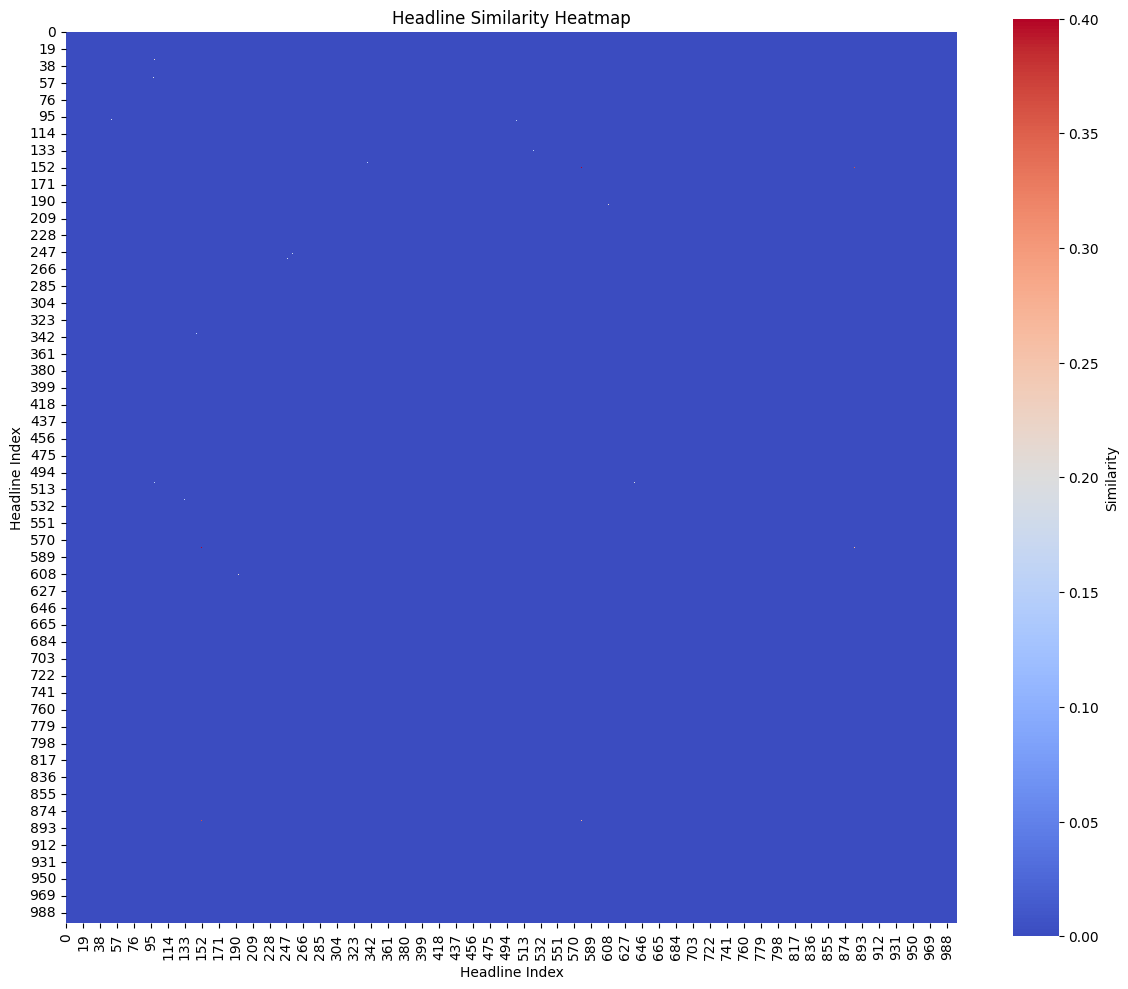

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

size = len(headlines)
sim_matrix = np.zeros((size, size))

for result in results:
    i = headlines[headlines == result['Headline 1']].index[0]
    j = headlines[headlines == result['Headline 2']].index[0]
    sim_matrix[i, j] = result['Similarity']
    sim_matrix[j, i] = result['Similarity']

plt.figure(figsize=(12, 10))
sns.heatmap(sim_matrix, cmap='coolwarm', square=True, cbar_kws={'label': 'Similarity'})
plt.title('Headline Similarity Heatmap')
plt.xlabel("Headline Index")
plt.ylabel("Headline Index")
plt.tight_layout()
plt.show()


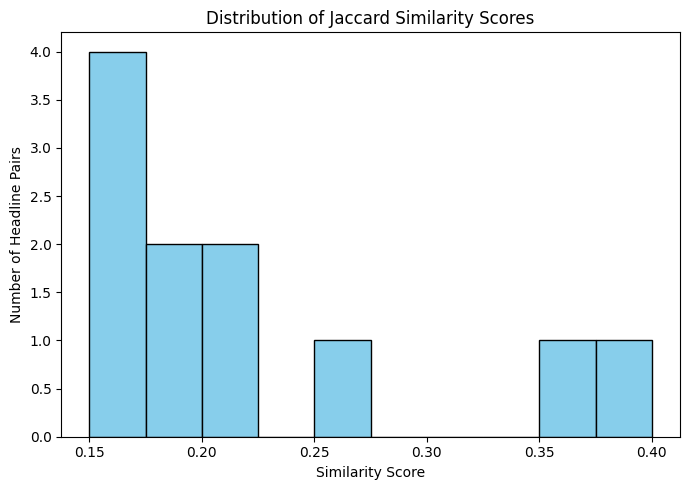

In [5]:
import matplotlib.pyplot as plt

scores = [r['Similarity'] for r in results]

plt.figure(figsize=(7, 5))
plt.hist(scores, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Jaccard Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Number of Headline Pairs")
plt.tight_layout()
plt.show()


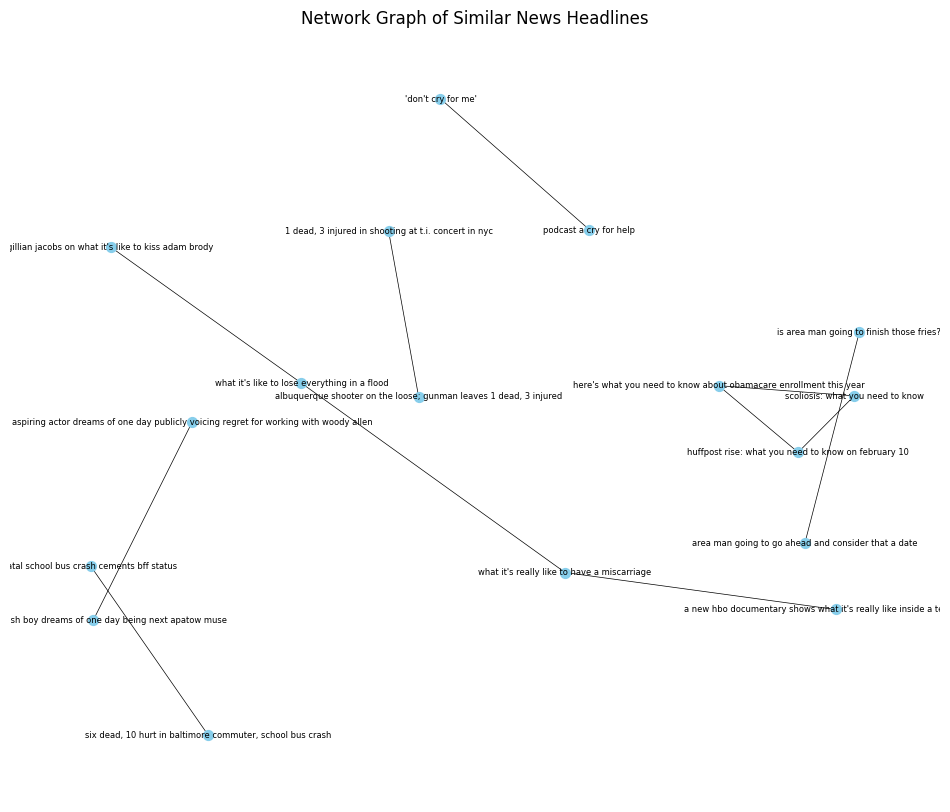

In [6]:
import networkx as nx

G = nx.Graph()
for row in results:
    G.add_edge(row['Headline 1'], row['Headline 2'], weight=row['Similarity'])

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=0.5)
nx.draw_networkx_labels(G, pos, font_size=6)
plt.title("Network Graph of Similar News Headlines")
plt.axis('off')
plt.show()


In [7]:
import pandas as pd

df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
headlines = df['headline'].astype(str).tolist()

def get_shingles(text, k=2):
    words = text.lower().split()
    return set([' '.join(words[i:i+k]) for i in range(len(words)-k+1)])

def jaccard_similarity(set1, set2):
    if not set1 or not set2:
        return 0.0
    return len(set1 & set2) / len(set1 | set2)

headline_shingles = [get_shingles(h) for h in headlines]

def find_similar_headlines(input_title, top_n=5):
    input_shingles = get_shingles(input_title)
    similarities = []

    for idx, sh in enumerate(headline_shingles):
        score = jaccard_similarity(input_shingles, sh)
        similarities.append((headlines[idx], score))

    similarities.sort(key=lambda x: x[1], reverse=True)

    print(f"\nTop {top_n} similar headlines to: \"{input_title}\"")
    for h, s in similarities[:top_n]:
        print(f"\n🔹 {h}\n   🔗 Similarity: {s:.2f}")

input_headline = input("Enter a news headline to compare: ")
find_similar_headlines(input_headline, top_n=5)


Enter a news headline to compare: job market hit highest layoff in history

Top 5 similar headlines to: "job market hit highest layoff in history"

🔹 second biggest opening in history
   🔗 Similarity: 0.11

🔹 first chapter in history of sino-american war of 2011 already written
   🔗 Similarity: 0.07

🔹 the job market is still years away from a full recovery
   🔗 Similarity: 0.07

🔹 biggest data leak in history reveals the global reach of dirty money
   🔗 Similarity: 0.06

🔹 'i am under 18' button clicked for first time in history of internet
   🔗 Similarity: 0.06
